<a href="https://colab.research.google.com/github/EricaAnnor/Dcit-316-final-project/blob/main/Sentiment_Analysis_and_Demographic_Trend_Identification_in_LGBT_Experiences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages


In [ ]:
pip install nltk pandas vaderSentiment


In [ ]:
from google.colab import drive
import nltk
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from nltk import pos_tag
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer



from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Mount drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/LGBT_Survey_Discrimination.csv")


## Exploratory data analysis

In [ ]:
data.head(25)

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,c10,Have you ever experienced any of the following...,Difficulty in gaining access to healthcare,2,[0]
1,Austria,Lesbian,c10,Have you ever experienced any of the following...,Having to change general practitioners or othe...,8,NaN
2,Austria,Lesbian,c10,Have you ever experienced any of the following...,Receiving unequal treatment when dealing with ...,3,[0]
3,Austria,Lesbian,c10,Have you ever experienced any of the following...,Foregoing treatment for fear of discrimination...,5,NaN
4,Austria,Lesbian,c10,Have you ever experienced any of the following...,Specific needs ignored (not taken into account),12,NaN
5,Austria,Lesbian,c10,Have you ever experienced any of the following...,Inappropriate curiosity,13,NaN
6,Austria,Lesbian,c10,Have you ever experienced any of the following...,Pressure or being forced to undergo any medica...,3,[0]
7,Austria,Lesbian,c10,Have you ever experienced any of the following...,I have never accessed healthcare services,2,[0]
8,Austria,Lesbian,c10,Have you ever experienced any of the following...,None of the above,68,NaN
9,Austria,Gay,c10,Have you ever experienced any of the following...,Difficulty in gaining access to healthcare,2,NaN


In [ ]:
original = data.copy()
original['answer'].head(10)

,answer
0,Difficulty in gaining access to healthcare
1,Having to change general practitioners or othe...
2,Receiving unequal treatment when dealing with ...
3,Foregoing treatment for fear of discrimination...
4,Specific needs ignored (not taken into account)
5,Inappropriate curiosity
6,Pressure or being forced to undergo any medica...
7,I have never accessed healthcare services
8,None of the above
9,Difficulty in gaining access to healthcare


In [ ]:
Data = original.copy()
new = Data.copy()

In [ ]:
data.head()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,Austria,Lesbian,c10,Have you ever experienced any of the following...,Difficulty in gaining access to healthcare,2,[0]
1,Austria,Lesbian,c10,Have you ever experienced any of the following...,Having to change general practitioners or othe...,8,NaN
2,Austria,Lesbian,c10,Have you ever experienced any of the following...,Receiving unequal treatment when dealing with ...,3,[0]
3,Austria,Lesbian,c10,Have you ever experienced any of the following...,Foregoing treatment for fear of discrimination...,5,NaN
4,Austria,Lesbian,c10,Have you ever experienced any of the following...,Specific needs ignored (not taken into account),12,NaN


In [ ]:
original['question_label'].head(15)

,question_label
0,Have you ever experienced any of the following...
1,Have you ever experienced any of the following...
2,Have you ever experienced any of the following...
3,Have you ever experienced any of the following...
4,Have you ever experienced any of the following...
5,Have you ever experienced any of the following...
6,Have you ever experienced any of the following...
7,Have you ever experienced any of the following...
8,Have you ever experienced any of the following...
9,Have you ever experienced any of the following...


In [ ]:
data.isnull()

,CountryCode,subset,question_code,question_label,answer,percentage,notes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
15770,False,False,False,False,False,False,True
15771,False,False,False,False,False,False,True
15772,False,False,False,False,False,False,True
15773,False,False,False,False,False,False,True


In [ ]:
data.shape

(15775, 7)

## Preprocessing


### Remove stop_words

In [ ]:


def remove_stop(text):
    stop_words = set(stopwords.words('english'))
    # Add important words to retain in stop_words set
    retain_words = {'no'}
    stop_words = stop_words - retain_words  # Remove 'no' from the stopwords set

    # Tokenize text while preserving punctuation
    tokens = regexp_tokenize(text.lower(), pattern=r"\s|[\.,;'\-!\*]", gaps=True)

    # Filter out stopwords but retain important words and punctuation
    filtered_tokens = [word for word in tokens if (word.isalpha() and word not in stop_words) or word in retain_words]
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text




### Remove digits

In [ ]:
def remove_digits(text):
  return re.sub('[0-9]+', '', text)

### Remove punctuation marks

In [ ]:
pun_list = string.punctuation

def remove_pun(text):
  translator = str.maketrans('','', pun_list)
  return text.translate(translator)

### Remove URLs

In [ ]:
def clean_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

### Remove Emails

In [ ]:
def clean_emails(text):
  return re.sub('@[^\s]+','', text)

### Get tokens

In [ ]:
def get_token(text):
  tokens = word_tokenize(text)
  return tokens

### Join tokens

In [ ]:
def joined(text):
  return ' '.join(text)

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no match

def apply_lemma(text):
    stemmer = WordNetLemmatizer()
    pos_tags = pos_tag(text)
    filtered = [stemmer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return filtered

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    retain_words = {'no'}
    stop_words = stop_words - retain_words  # Remove 'no' from the stopwords set

    tokens = word_tokenize(text.lower())

    filtered_tokens = [word for word in tokens if (word.isalpha() and word not in stop_words) or word in retain_words or not word.isalpha()]
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text



## Applying preprocessing functions to our data

### Combine question label and answer for contextual understanding and effective sentiment analysis

In [ ]:
data['answer'] = data['answer'].apply(remove_stopwords)

In [ ]:
data['answer'].head(10)

,answer
0,difficulty gaining access healthcare
1,change general practitioners specialists due n...
2,receiving unequal treatment dealing medical staff
3,foregoing treatment fear discrimination intole...
4,specific needs ignored ( taken account )
5,inappropriate curiosity
6,pressure forced undergo medical psychological ...
7,never accessed healthcare services
8,none
9,difficulty gaining access healthcare


In [ ]:
data['answer'] = data['answer'].apply(remove_digits)
data['answer'].head()

,answer
0,difficulty gaining access healthcare
1,change general practitioners specialists due n...
2,receiving unequal treatment dealing medical staff
3,foregoing treatment fear discrimination intole...
4,specific needs ignored ( taken account )


In [ ]:
data['answer'] = data['answer'].apply(clean_URLs).apply(clean_emails)
data['answer'].head()

,answer
0,difficulty gaining access healthcare
1,change general practitioners specialists due n...
2,receiving unequal treatment dealing medical staff
3,foregoing treatment fear discrimination intole...
4,specific needs ignored ( taken account )


In [ ]:
data['answer'] = data['answer'].apply(get_token)
data['answer'].head()

,answer
0,"[difficulty, gaining, access, healthcare]"
1,"[change, general, practitioners, specialists, ..."
2,"[receiving, unequal, treatment, dealing, medic..."
3,"[foregoing, treatment, fear, discrimination, i..."
4,"[specific, needs, ignored, (, taken, account, )]"


In [ ]:
data['answer'] = data['answer'].apply(apply_lemma)
data['answer'].head()

,answer
0,"[difficulty, gain, access, healthcare]"
1,"[change, general, practitioner, specialist, du..."
2,"[receive, unequal, treatment, deal, medical, s..."
3,"[forego, treatment, fear, discrimination, into..."
4,"[specific, need, ignore, (, take, account, )]"


In [ ]:
data['answer'] = data['answer'].apply(joined)
data['answer'].head()

,answer
0,difficulty gain access healthcare
1,change general practitioner specialist due neg...
2,receive unequal treatment deal medical staff
3,forego treatment fear discrimination intoleran...
4,specific need ignore ( take account )


## Building Model

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define lists of negative and positive keywords
negative_keywords = [
    "difficulty", "fear", "unequal treatment", "foregoing treatment",
    "ignored", "discrimination", "harassment", "violence", "abuse", "threats","yes",'always','often'
]
positive_keywords = [
    "no", "never", "not at all", "none","rarely"
]

# Function to map VADER sentiment scores to categories and adjust with keywords
def combined_sentiment_category(answer):
    # Use VADER to get the sentiment score
    score = analyzer.polarity_scores(answer)
    compound_score = score['compound']

    # Check for presence of negative keywords
    if any(kw in answer.lower() for kw in negative_keywords):
        return 'negative'
    # Check for presence of positive keywords
    elif any(kw in answer.lower() for kw in positive_keywords):
        return 'positive'
    # Use VADER compound score to determine sentiment
    elif compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'



# Apply the combined sentiment analysis to the 'answer' column
data['combined_sentiment'] = data['answer'].apply(combined_sentiment_category)

# Summarize the sentiment distribution
combined_sentiment_summary = data['combined_sentiment'].value_counts()
print(combined_sentiment_summary)


combined_sentiment
positive    8910
negative    6584
neutral      281
Name: count, dtype: int64


In [ ]:
data.head(50)

,CountryCode,subset,question_code,question_label,answer,percentage,notes,combined_sentiment
0,Austria,Lesbian,c10,Have you ever experienced any of the following...,difficulty gain access healthcare,2,[0],negative
1,Austria,Lesbian,c10,Have you ever experienced any of the following...,change general practitioner specialist due neg...,8,NaN,negative
2,Austria,Lesbian,c10,Have you ever experienced any of the following...,receive unequal treatment deal medical staff,3,[0],negative
3,Austria,Lesbian,c10,Have you ever experienced any of the following...,forego treatment fear discrimination intoleran...,5,NaN,negative
4,Austria,Lesbian,c10,Have you ever experienced any of the following...,specific need ignore ( take account ),12,NaN,positive
5,Austria,Lesbian,c10,Have you ever experienced any of the following...,inappropriate curiosity,13,NaN,neutral
6,Austria,Lesbian,c10,Have you ever experienced any of the following...,pressure force undergo medical psychological test,3,[0],negative
7,Austria,Lesbian,c10,Have you ever experienced any of the following...,never access healthcare service,2,[0],positive
8,Austria,Lesbian,c10,Have you ever experienced any of the following...,none,68,NaN,positive
9,Austria,Gay,c10,Have you ever experienced any of the following...,difficulty gain access healthcare,2,NaN,negative


In [ ]:
data.tail(50)

,CountryCode,subset,question_code,question_label,answer,percentage,notes,combined_sentiment
15725,Sweden,Lesbian,discrim1yr,"During the last 12 months, have you personally...",yes,43,NaN,negative
15726,Sweden,Lesbian,discrim1yr,"During the last 12 months, have you personally...",no,57,NaN,positive
15727,Sweden,Gay,discrim1yr,"During the last 12 months, have you personally...",yes,29,NaN,negative
15728,Sweden,Gay,discrim1yr,"During the last 12 months, have you personally...",no,71,NaN,positive
15729,Sweden,Bisexual women,discrim1yr,"During the last 12 months, have you personally...",yes,33,NaN,negative
15730,Sweden,Bisexual women,discrim1yr,"During the last 12 months, have you personally...",no,67,NaN,positive
15731,Sweden,Bisexual men,discrim1yr,"During the last 12 months, have you personally...",yes,24,NaN,negative
15732,Sweden,Bisexual men,discrim1yr,"During the last 12 months, have you personally...",no,76,NaN,positive
15733,Sweden,Transgender,discrim1yr,"During the last 12 months, have you personally...",yes,45,NaN,negative
15734,Sweden,Transgender,discrim1yr,"During the last 12 months, have you personally...",no,55,NaN,positive


In [ ]:
country_sentiment = data.groupby(['CountryCode', 'combined_sentiment']).size().unstack(fill_value=0)
print(country_sentiment)


combined_sentiment  negative  neutral  positive
CountryCode                                    
Austria                  229       10       308
Average                  229       10       308
Belgium                  227       10       308
Bulgaria                 228       10       308
Croatia                  228       10       307
Cyprus                   223        8       304
Czech Republic           227       10       308
Denmark                  226       10       308
Estonia                  221        9       303
Finland                  229       10       308
France                   229       10       308
Germany                  229       10       308
Greece                   229       10       308
Hungary                  229       10       308
Ireland                  229       10       308
Italy                    229       10       308
Latvia                   225        8       306
Lithuania                229       10       308
Luxembourg               219        9   

In [ ]:
demographic_sentiment = data.groupby(['subset', 'combined_sentiment']).size().unstack(fill_value=0)
print(demographic_sentiment)


combined_sentiment  negative  neutral  positive
subset                                         
Bisexual men            1281       53      1729
Bisexual women          1279       58      1733
Gay                     1305       58      1740
Lesbian                 1302       57      1740
Transgender             1417       55      1968


In [ ]:
cross_demographic_sentiment = data.groupby(['CountryCode', 'subset', 'combined_sentiment']).size().unstack(fill_value=0).reset_index()
print(cross_demographic_sentiment)


combined_sentiment     CountryCode          subset  negative  neutral  \
0                          Austria    Bisexual men        45        2   
1                          Austria  Bisexual women        45        2   
2                          Austria             Gay        45        2   
3                          Austria         Lesbian        45        2   
4                          Austria     Transgender        49        2   
..                             ...             ...       ...      ...   
140                 United Kingdom    Bisexual men        45        2   
141                 United Kingdom  Bisexual women        45        2   
142                 United Kingdom             Gay        45        2   
143                 United Kingdom         Lesbian        45        2   
144                 United Kingdom     Transgender        49        2   

combined_sentiment  positive  
0                         60  
1                         60  
2                         60  

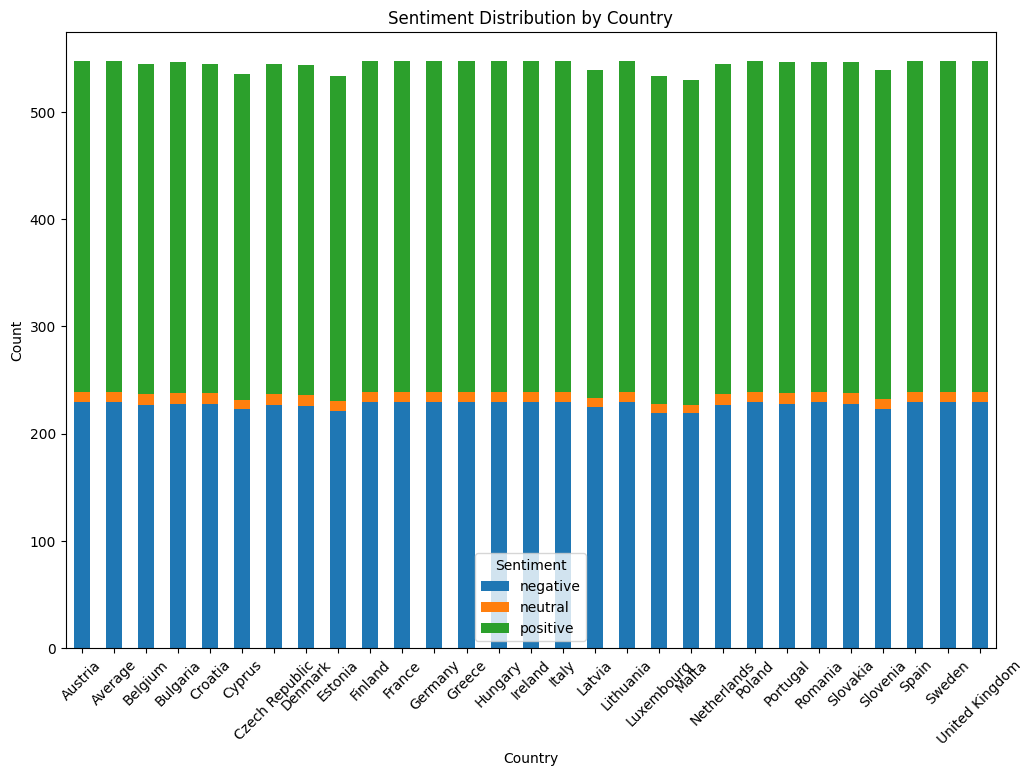

In [ ]:
country_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


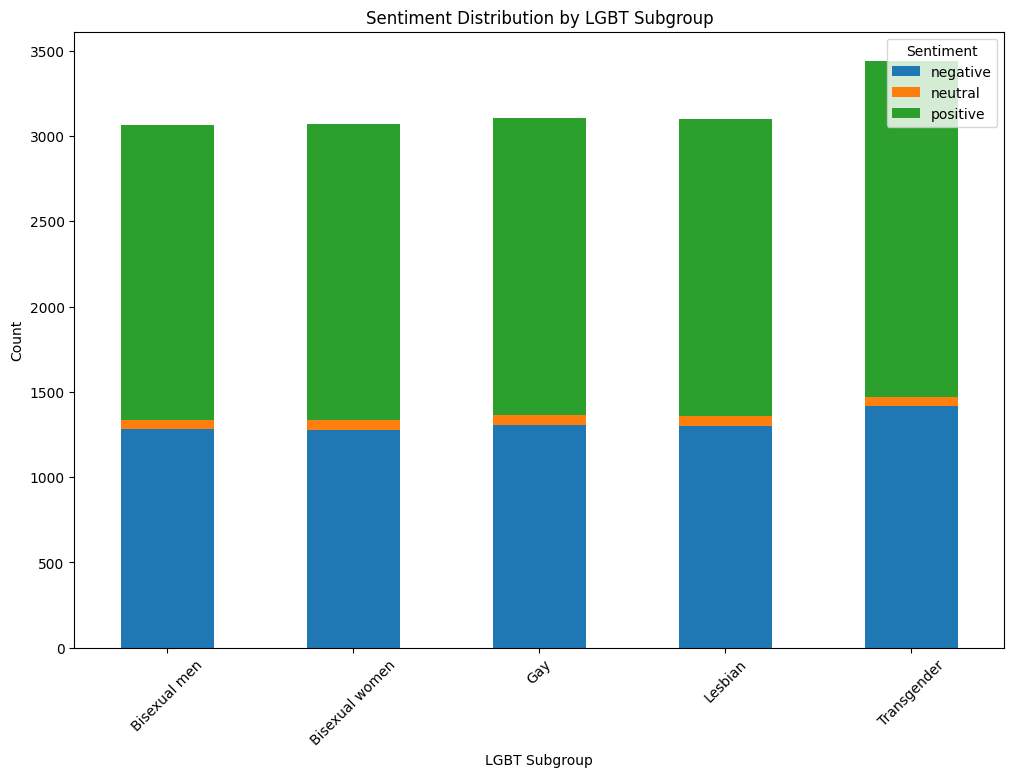

In [ ]:
demographic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by LGBT Subgroup')
plt.xlabel('LGBT Subgroup')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()


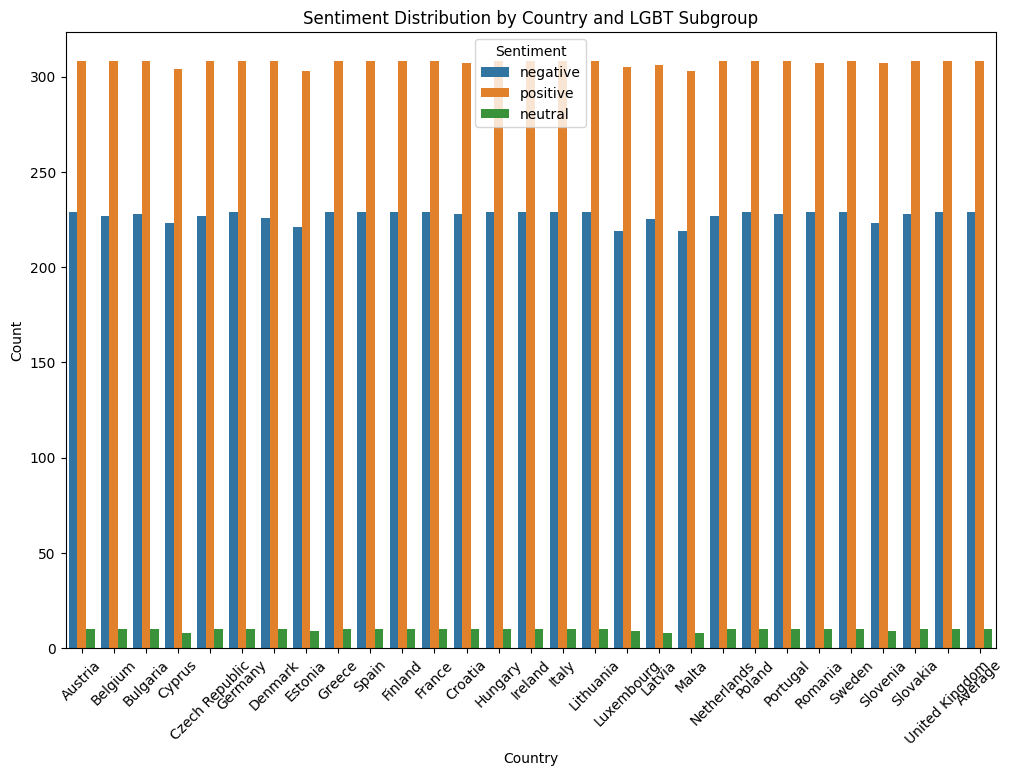

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='CountryCode', hue='combined_sentiment', dodge=True)
plt.title('Sentiment Distribution by Country and LGBT Subgroup')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()
